# Downsampling Experiments

In [10]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize': (11.7, 8.27)})  # landscape A4

In [2]:
sns.set_theme()

palette = sns.color_palette('deep')
palette = palette[0:3] + [palette[4]] + palette[6:]
palette = sns.color_palette(palette, n_colors=8)
palette

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

## Accuracy

In [38]:
baseline_df = pd.read_csv("~/Documents/Thesis/Data/downscale_baseline.csv", delimiter=",")
baseline_df["Algorithm"] = "Baseline"
baseline_df["Temperature"] = 10.0
kd_df = pd.read_csv("~/Documents/Thesis/Data/downscale_kd.csv", delimiter=",")
kd_df["Algorithm"] = "KD"
dml_df = pd.read_csv("~/Documents/Thesis/Data/downscale_dml.csv", delimiter=",")
dml_df["Algorithm"] = "DML"
dml_df["Temperature"] = 10.0

In [31]:
full_df = pd.merge(kd_df, dml_df, how="outer")
full_df = pd.merge(baseline_df, full_df, how="outer")
full_df

,Name,Image Size,Accuracy,Algorithm,Temperature
0,downscale168-baseline-001-20,168,0.619862,Baseline,10.0
1,downscale42-baseline-001-20,42,0.360285,Baseline,10.0
2,downscale2-baseline-001-20,112,0.561523,Baseline,10.0
3,downscale4-baseline-001-20,56,0.419143,Baseline,10.0
4,downscale8-baseline-001-20,28,0.257395,Baseline,10.0
5,Baseline-baseline-001-20,224,0.650000,Baseline,10.0
6,downscale168-kd-001-20,168,0.638851,KD,10.0
7,downscale168-kd-001-20-temp20,168,0.636751,KD,20.0
8,downscale42-kd-temp20,42,0.276382,KD,20.0
9,downscale8-kd-temp20,28,0.197608,KD,20.0


In [ ]:
# full_df.mask(full_df["Temperature"] == 20.0).dropna()

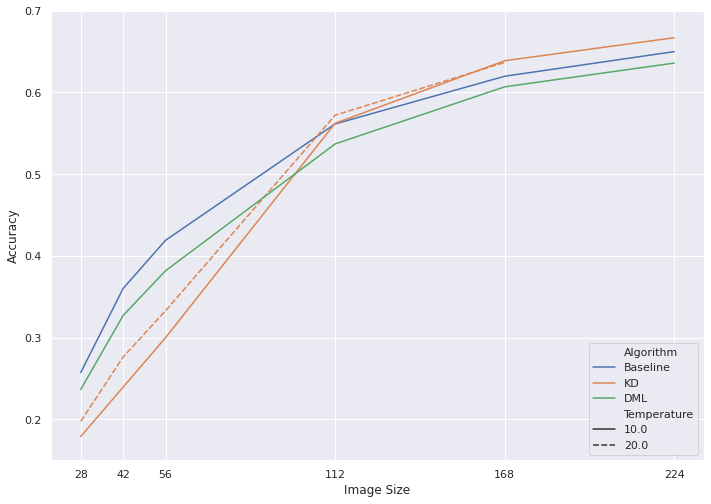

In [46]:
ax = sns.lineplot(data=full_df, x="Image Size", y="Accuracy", hue="Algorithm", style="Temperature")
# ax.set_xscale("log")
ax.set_xticks(baseline_df["Image Size"].to_list())
ax.set_ylim(0.15, 0.7)
ax.legend(title='', loc='lower right')
# ax.set(xlabel='Oversampling', ylabel='Validation Accuracy')

plt.savefig(f"/home/pia/Pictures/Plots/Thesis/downscale.pdf", bbox_inches="tight")
plt.savefig(f"/home/pia/Pictures/Plots/Thesis/downscale.png", bbox_inches="tight")

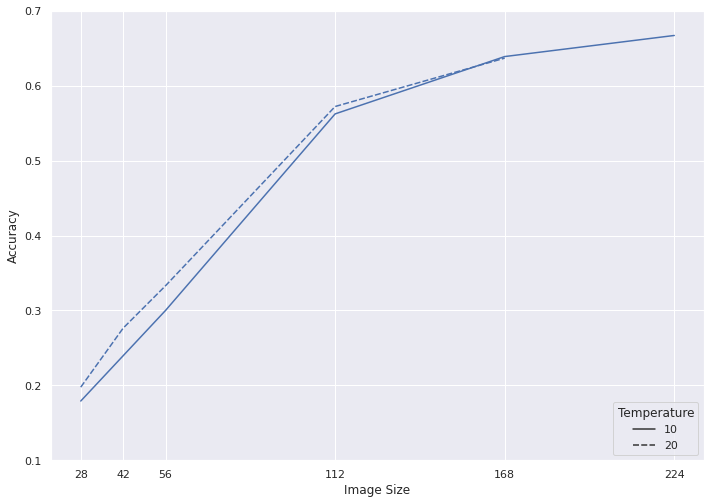

In [36]:
ax = sns.lineplot(data=kd_df, x="Image Size", y="Accuracy", style="Temperature")
# ax.set_xscale("log")
ax.set_xticks(baseline_df["Image Size"].to_list())
ax.set_ylim(0.1, 0.7)
ax.legend(title='Temperature', loc='lower right')
# ax.set(xlabel='Oversampling', ylabel='Validation Accuracy')

# plt.savefig(f"/home/pia/Pictures/Plots/Thesis/downscale.pdf", bbox_inches="tight")
# plt.savefig(f"/home/pia/Pictures/Plots/Thesis/downscale.png", bbox_inches="tight")

## Training Time

In [89]:
base_time_df = pd.read_csv("~/Documents/Thesis/Data/downscale_baseline_runtime.csv", delimiter=",")
base_time_df["Algorithm"] = "Baseline"
base_time_df["Temperature"] = 10.0
kd_time_df = pd.read_csv("~/Documents/Thesis/Data/downscale_kd_runtime.csv", delimiter=",")
kd_time_df["Algorithm"] = "KD"
dml_time_df = pd.read_csv("~/Documents/Thesis/Data/downscale_dml_runtime.csv", delimiter=",")
dml_time_df["Algorithm"] = "DML"
dml_time_df["Temperature"] = 10.0
bench_time_df = pd.read_csv("~/Documents/Thesis/Data/imagenet_runtime.csv", delimiter=",")
bench_time_df = bench_time_df.drop(bench_time_df[bench_time_df.Algorithm == "Tf-KD"].index)
bench_time_df = bench_time_df.drop(bench_time_df[bench_time_df.Algorithm == "Baseline"].index)

In [90]:
base_time_df

,Name,downscale,Image Size,Relative Time (Process),Algorithm,Temperature
0,downscale168-baseline-001-20,"[168,168]",168,143885,Baseline,10.0
1,downscale42-baseline-001-20,"[42,42]",42,79411,Baseline,10.0
2,downscale2-baseline-001-20,2,112,103465,Baseline,10.0
3,downscale4-baseline-001-20,4,56,91192,Baseline,10.0
4,downscale8-baseline-001-20,8,28,92245,Baseline,10.0


In [91]:
for df in [base_time_df, kd_time_df, dml_time_df, bench_time_df]:
    df["Relative Time (Process)"] = df["Relative Time (Process)"] / 3600

In [92]:
fulltime_df = pd.merge(kd_time_df, dml_time_df, how="outer")
fulltime_df = pd.merge(base_time_df, fulltime_df, how="outer")
fulltime_df = pd.merge(fulltime_df, bench_time_df, how="outer")
fulltime_df

,Name,downscale,Image Size,Relative Time (Process),Algorithm,Temperature
0,downscale168-baseline-001-20,"[168,168]",168,39.968056,Baseline,10.0
1,downscale42-baseline-001-20,"[42,42]",42,22.058611,Baseline,10.0
2,downscale2-baseline-001-20,2,112,28.740278,Baseline,10.0
3,downscale4-baseline-001-20,4,56,25.331111,Baseline,10.0
4,downscale8-baseline-001-20,8,28,25.623611,Baseline,10.0
5,downscale168-kd-001-20,"[168,168]",168,44.380833,KD,10.0
6,downscale168-kd-001-20-temp20,"[168,168]",168,44.024167,KD,20.0
7,downscale42-kd-temp20,"[42,42]",42,24.468889,KD,20.0
8,downscale8-kd-temp20,8,28,24.220000,KD,20.0
9,downscale2-kd-01-20,2,112,30.799444,KD,10.0


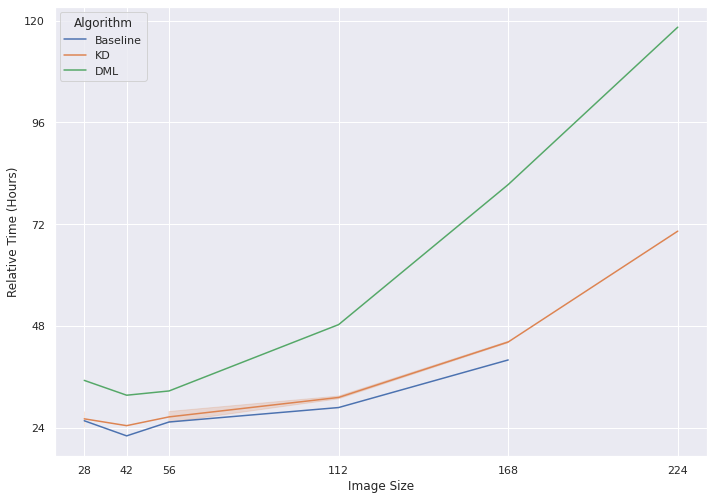

In [98]:
ax = sns.lineplot(data=fulltime_df, x="Image Size", y="Relative Time (Process)", hue="Algorithm")
ax.set_xticks(base_time_df["Image Size"].to_list()+ [224])
ax.set_ylabel("Relative Time (Hours)")
ax.set_yticks([24 * i for i in range(1, 6)])

plt.savefig(f"/home/pia/Pictures/Plots/Thesis/downscale_time.pdf", bbox_inches="tight")
plt.savefig(f"/home/pia/Pictures/Plots/Thesis/downscale_time.png", bbox_inches="tight")

# Overfitting Visualization

[Tutorial from Scikit-Learn](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [2]:
np.random.seed(0)
sns.set_theme()
# sns.set(rc={'figure.figsize': (11.7, 8.27)})

In [3]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

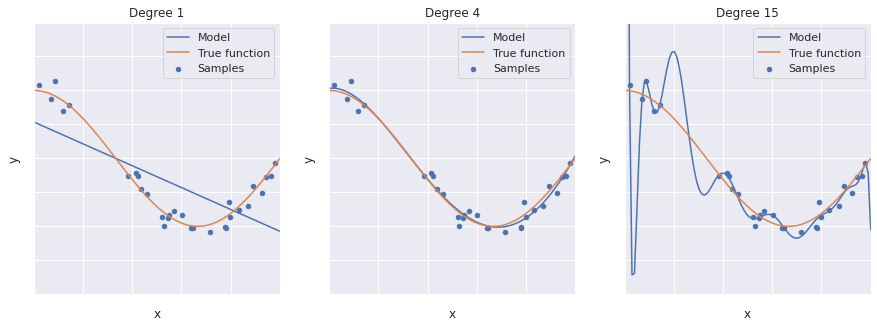

In [13]:
plt.figure(figsize=(15, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.xticks(np.arange(0, 1, step=0.2), [])
    plt.yticks(np.arange(-2, 2, step=0.5), [])
    plt.legend(loc="best")
    # plt.title(
    #     "Degree {}\nMSE = {:.3f}(+/- {:.3f})".format(
    #         degrees[i], -scores.mean(), scores.std()
    #     )
    # )
    plt.title(f"Degree {degrees[i]}")

plt.savefig("overfitting.pdf", format="pdf", pad_inches=0.0, bbox_inches="tight")
plt.show()

# More Visuals

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as T
from PIL import Image

plt.rcParams["savefig.bbox"] = 'tight'


In [69]:
orig_img = Image.open("/home/pia/Documents/data/imagecat/val/tiger_cat/ILSVRC2012_val_00012339.JPEG")
square_img = Image.open("/home/pia/Pictures/Thesis/tiger-cat_sample.JPEG")
# square_img = T.CenterCrop(224)(orig_img)

In [15]:
#http://pytorch.org/vision/main/auto_examples/plot_transforms.html#illustration-of-transforms

def plot(imgs, with_orig=True, col_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        row = [orig_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if with_orig:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
    if col_title is not None:
        for col_idx in range(num_cols):
            axs[0, col_idx].set(title=col_title[col_idx])

    plt.tight_layout()

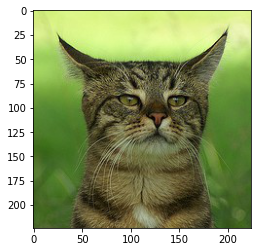

In [5]:
plt.imshow(square_img)

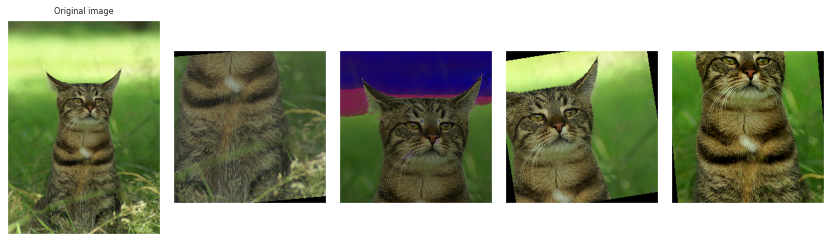

In [81]:
augmenter = T.Compose([T.RandomCrop(224), T.RandAugment()])
augmented_imgs = [augmenter(orig_img) for _ in range(4)]
plot(augmented_imgs, with_orig=True)
plt.savefig(f"/home/pia/Pictures/Plots/Thesis/randaugment_sample.pdf", bbox_inches="tight")
plt.savefig(f"/home/pia/Pictures/Plots/Thesis/randaugment_sample.png", bbox_inches="tight")

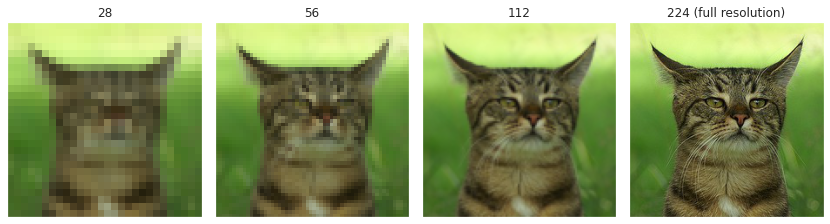

In [16]:
resized_imgs = [T.Resize(size=size)(square_img) for size in (28, 56, 112, square_img.size)]
plot(resized_imgs, with_orig=False, col_title=["28", "56", "112", "224 (full resolution)"])
# plt.savefig(f"/home/pia/Pictures/Plots/Thesis/downscale_sample.pdf", bbox_inches="tight")
# plt.savefig(f"/home/pia/Pictures/Plots/Thesis/downscale_sample.png", bbox_inches="tight")